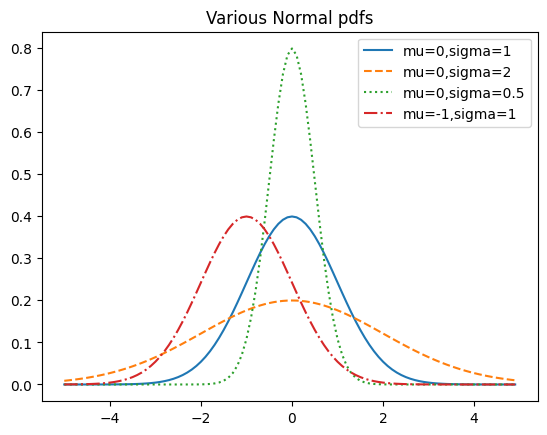

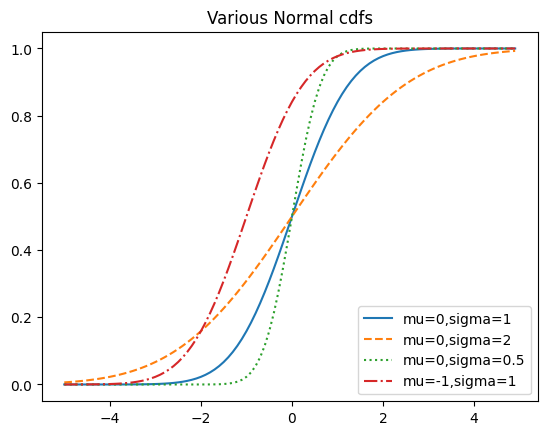

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


In [3]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X <= 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()


# plt.savefig('im/various_normal_pdfs.png')
#plt.gca().clear()
#plt.close()
#plt.clf()

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()


#plt.close()
#plt.gca().clear()
#plt.clf()

def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z


import random

def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

def main():
    import enum, random
    
    # An Enum is a typed set of enumerated values. We can use them
    # to make our code more descriptive and readable.
    class Kid(enum.Enum):
        BOY = 0
        GIRL = 1
    
    def random_kid() -> Kid:
        return random.choice([Kid.BOY, Kid.GIRL])
    
    both_girls = 0
    older_girl = 0
    either_girl = 0
    
    random.seed(0)
    
    for _ in range(10000):
        younger = random_kid()
        older = random_kid()
        if older == Kid.GIRL:
            older_girl += 1
        if older == Kid.GIRL and younger == Kid.GIRL:
            both_girls += 1
        if older == Kid.GIRL or younger == Kid.GIRL:
            either_girl += 1
    
    print("P(both | older):", both_girls / older_girl)     # 0.514 ~ 1/2
    print("P(both | either): ", both_girls / either_girl)  # 0.342 ~ 1/3
    
    
    
    assert 0.48 < both_girls / older_girl < 0.52
    assert 0.30 < both_girls / either_girl < 0.35
    
    def uniform_pdf(x: float) -> float:
        return 1 if 0 <= x < 1 else 0
    
if __name__ == "__main__": main()


In [4]:
from typing import Tuple
import math

def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    """Returns mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

#from scratch.probability import normal_cdf

# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# It's above the threshold if it's not below the threshold
def normal_probability_above(lo: float,
                             mu: float = 0,
                             sigma: float = 1) -> float:
    """The probability that a N(mu, sigma) is greater than lo."""
    return 1 - normal_cdf(lo, mu, sigma)

# It's between if it's less than hi, but not less than lo.
def normal_probability_between(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """The probability that a N(mu, sigma) is between lo and hi."""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# It's outside if it's not between
def normal_probability_outside(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """The probability that a N(mu, sigma) is not between lo and hi."""
    return 1 - normal_probability_between(lo, hi, mu, sigma)

#from scratch.probability import inverse_normal_cdf

def normal_upper_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float,
                            mu: float = 0,
                            sigma: float = 1) -> Tuple[float, float]:
    """
    Returns the symmetric (about the mean) bounds
    that contain the specified probability
    """
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)


assert mu_0 == 500
assert 15.8 < sigma_0 < 15.9

# (469, 531)
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)

lower_bound, upper_bound

(469.01026640487555, 530.9897335951244)

In [5]:
assert 468.5 < lower_bound < 469.5
assert 530.5 < upper_bound < 531.5

# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
lo, hi

(469.01026640487555, 530.9897335951244)

In [6]:
# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
mu_1, sigma_1

(550.0, 15.732132722552274)

In [7]:
# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability      # 0.887

type_2_probability, power

(0.11345199870463285, 0.8865480012953671)

In [8]:
mu_0, sigma_0

(500.0, 15.811388300841896)

In [9]:
mu_1, sigma_1

(550.0, 15.732132722552274)

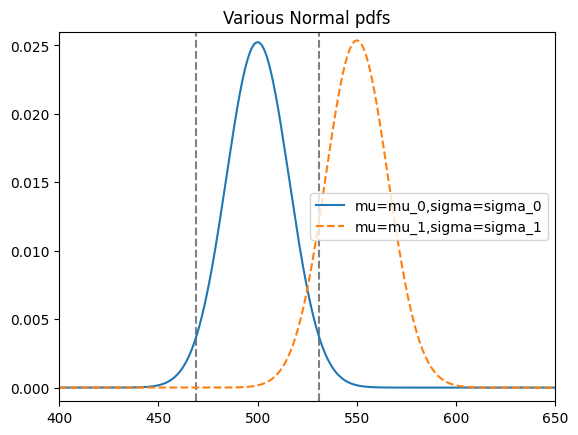

In [10]:
import matplotlib.pyplot as plt
xs = [x / 10 for x in range(0, 10000)]
plt.plot(xs,[normal_pdf(x,mu=mu_0, sigma=sigma_0) for x in xs],'-',label='mu=mu_0,sigma=sigma_0')
plt.plot(xs,[normal_pdf(x,mu=mu_1, sigma=sigma_1) for x in xs],'--',label='mu=mu_1,sigma=sigma_1')
plt.vlines(x=lo, ymin=-0.001, ymax=0.026, colors = 'gray', linestyles='dashed')
plt.vlines(x=hi, ymin=-0.001, ymax=0.026, colors = 'gray', linestyles='dashed')
plt.xlim((400, 650))
plt.ylim((-0.001, 0.026))
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [11]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the upper tail)

type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability      # 0.936


assert 526 < hi < 526.1
assert 0.9363 < power < 0.9364

def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """
    How likely are we to see a value at least as extreme as x (in either
    direction) if our values are from a N(mu, sigma)?
    """
    if x >= mu:
        # x is greater than the mean, so the tail is everything greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x is less than the mean, so the tail is everything less than x
        return 2 * normal_probability_below(x, mu, sigma)

two_sided_p_value(529.5, mu_0, sigma_0)   # 0.062

import random

extreme_value_count = 0
for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0    # Count # of heads
                    for _ in range(1000))                # in 1000 flips,
    if num_heads >= 530 or num_heads <= 470:             # and count how often
        extreme_value_count += 1                         # the # is 'extreme'

# p-value was 0.062 => ~62 extreme values out of 1000
assert 59 < extreme_value_count < 65, f"{extreme_value_count}"

two_sided_p_value(531.5, mu_0, sigma_0)   # 0.0463


tspv = two_sided_p_value(531.5, mu_0, sigma_0)
assert 0.0463 < tspv < 0.0464

upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

upper_p_value(524.5, mu_0, sigma_0) # 0.061

upper_p_value(526.5, mu_0, sigma_0) # 0.047

p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)   # 0.0158

normal_two_sided_bounds(0.95, mu, sigma)        # [0.4940, 0.5560]

p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000) # 0.0158
normal_two_sided_bounds(0.95, mu, sigma) # [0.5091, 0.5709]

from typing import List

def run_experiment() -> List[bool]:
    """Flips a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment: List[bool]) -> bool:
    """Using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                      if reject_fairness(experiment)])

assert num_rejections == 46

def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

z = a_b_test_statistic(1000, 200, 1000, 180)    # -1.14


assert -1.15 < z < -1.13

two_sided_p_value(z)                            # 0.254


assert 0.253 < two_sided_p_value(z) < 0.255

z = a_b_test_statistic(1000, 200, 1000, 150)    # -2.94
two_sided_p_value(z)                            # 0.003

0.003189699706216853

In [12]:
def B(alpha: float, beta: float) -> float:
    """A normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x <= 0 or x >= 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

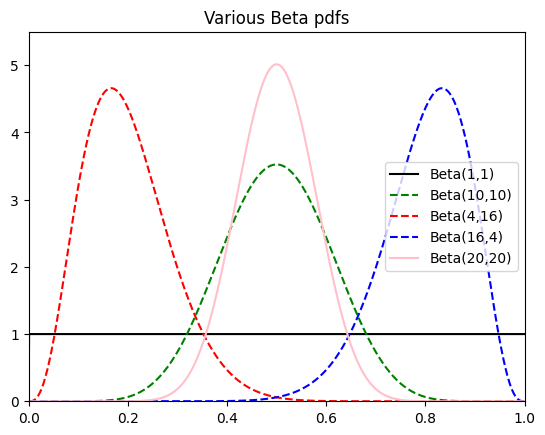

In [24]:
import matplotlib.pyplot as plt
xs = [x / 1000 for x in range(0, 1000)]
plt.plot(xs,[beta_pdf(x,alpha=1, beta=1) for x in xs],'black',label='Beta(1,1)')
plt.plot(xs,[beta_pdf(x,alpha=10, beta=10) for x in xs],'g--',label='Beta(10,10)')
plt.plot(xs,[beta_pdf(x,alpha=4, beta=16) for x in xs],'r--',label='Beta(4,16)')
plt.plot(xs,[beta_pdf(x,alpha=16, beta=4) for x in xs],'b--',label='Beta(16,4)')
plt.plot(xs,[beta_pdf(x,alpha=20, beta=20) for x in xs],'pink',label='Beta(20,20)')
plt.xlim((0, 1.0))
plt.ylim((0, 5.5))
plt.legend()
plt.title("Various Beta pdfs")
plt.show()

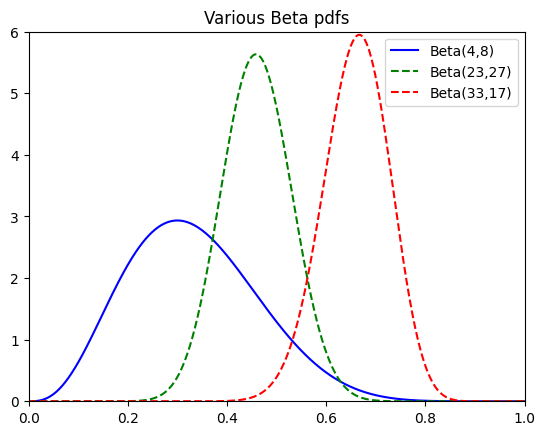

In [28]:
import matplotlib.pyplot as plt
xs = [x / 1000 for x in range(0, 1000)]
plt.plot(xs,[beta_pdf(x,alpha=4, beta=8) for x in xs],'b',label='Beta(4,8)')
plt.plot(xs,[beta_pdf(x,alpha=23, beta=27) for x in xs],'g--',label='Beta(23,27)')
plt.plot(xs,[beta_pdf(x,alpha=33, beta=17) for x in xs],'r--',label='Beta(33,17)')
plt.xlim((0, 1.0))
plt.ylim((0, 6.0))
plt.legend()
plt.title("Various Beta pdfs")
plt.show()